# **Twitter Exploration with Python:**

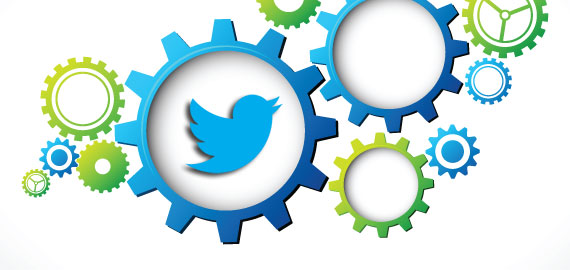

In [1]:
!pip install tweepy

In [89]:
!pip install earthpy

     |████████████████████████████████| 1.4 MB 22.6 MB/s 
     |████████████████████████████████| 1.0 MB 46.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 16.7 MB 59.7 MB/s 
     |████████████████████████████████| 6.3 MB 56.3 MB/s 


# **Part 1: Extract and summarize twitter hashtags**

In [2]:
import pandas as pd

In [3]:
import tweepy
import tweepy as tw

#Twitter API key and API secret
my_api_key = "K098MNRcmZqCJAUH6lmgeEUvn"
my_api_secret = "8g2OSrn6e5ps8lukJJ2IascVA7i3aPFqzlDGF9NCaT1a52WjsG"


In [4]:
#authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [80]:
#importing required libraries for analysis:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import json



import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [26]:
#search for a hashtag with filter
search_query = "#climate+change -filter:retweets"
tweets = tw.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2020-09-16").items(100)
              
# store the API responses in a list
tweets_term = []
for tweet in tweets:
    tweets_term.append(tweet)
    
print("Total Tweets fetched:", len(tweets_term))

Total Tweets fetched: 100


In [27]:
print("Total Tweets fetched:", len(tweets_term))

Total Tweets fetched: 100


In [28]:
# intialize the dataframe
tweets_df = pd.DataFrame()


In [29]:
# populate the dataframe
for tweet in tweets_term:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

In [30]:
# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Stuart Hale,In the hills,Roaming the hills of Appalachia and documentin...,False,2022-04-25 17:16:48,"[to] ""accelerate #conservation efforts in five...","[conservation, climate]",Twitter Web App
1,Social & Political,Florida & Nova Scotia,InnerSelf's Social & Political topics include ...,False,2022-04-25 17:16:45,Ignoring Young People's #ClimateChange Fears I...,"[ClimateChange, Anxiety, climatecrisis, climat...",Jocial
2,NRDC India,,@NRDC's India Program works with partners in I...,False,2022-04-25 17:11:34,#Climate change hits home as increasing #heatw...,"[Climate, heatwave, India]",Twitter Web App
3,IIEP at GWU,"Washington, DC",The Institute for International Economic Polic...,True,2022-04-25 17:10:36,Why is the Bangladesh story really important f...,None,Twitter Web App
4,WSMR,"White Sands, NM",The official site of White Sands Missile Range...,False,2022-04-25 17:07:46,The Army is leading the DOD as the first milit...,None,Twitter Web App


In [31]:
tweets_df['user_verified']. value_counts()

False    90
True     10
Name: user_verified, dtype: int64

In [32]:
tweets_df.isnull().sum()

user_name            0
user_location        0
user_description     0
user_verified        0
date                 0
text                 0
hashtags            28
source               0
dtype: int64

In [33]:
tweets_df.source.value_counts()

Twitter Web App                37
Hootsuite Inc.                 14
Twitter for Android            12
Twitter for iPhone              6
Buffer                          3
TweetDeck                       2
SocialPilot.co                  2
Gridpointwx                     2
weather-globe                   2
dlvr.it                         2
Twitter for iPad                2
Jocial                          2
SocialBee.io v2                 2
HubSpot                         2
Planable                        1
boc.vip                         1
IFTTT                           1
Agorapulse app                  1
Sprout Social                   1
Qnary.io                        1
Echobox                         1
National Park Climate Facts     1
SocialChamp IO                  1
Publer.io                       1
Name: source, dtype: int64

In [34]:
tweets_df.user_location.value_counts()

                                  16
Washington                         3
Washington, DC                     3
Bozeman, Mont.                     3
New York, USA                      2
                                  ..
Oklahoma, USA                      1
The Netherlands                    1
Leh, Union Territory of Ladakh     1
Tucson, Arizona                    1
New Delhi                          1
Name: user_location, Length: 70, dtype: int64

In [35]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [38]:
# Note how capitalization impacts unique returned values
ex_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Get unique elements in the list
set(ex_list)
{',', 'Dog', 'cat', 'dog'}

{',', 'Dog', 'cat', 'dog'}

In [39]:
# Note how capitalization impacts unique returned values
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case

['dog', 'dog', 'dog', 'cat', 'cat', ',']

In [40]:
# Now you have only unique words
set(lower_case)

{',', 'cat', 'dog'}

In [41]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].split()
['CLIMATE',
 'change',
 'causing',
 'wildfires',
 'to',
 'become',
 'more',
 'intense',
 'GlobalWarming',
 'climatechange']

['CLIMATE',
 'change',
 'causing',
 'wildfires',
 'to',
 'become',
 'more',
 'intense',
 'GlobalWarming',
 'climatechange']

In [42]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['the',
 'army',
 'is',
 'leading',
 'the',
 'dod',
 'as',
 'the',
 'first',
 'military',
 'branch',
 'to',
 'have',
 'an',
 'official',
 'position',
 'on',
 'climate',
 'change',
 'by',
 'publishi']

In [43]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['the',
  'army',
  'is',
  'leading',
  'the',
  'dod',
  'as',
  'the',
  'first',
  'military',
  'branch',
  'to',
  'have',
  'an',
  'official',
  'position',
  'on',
  'climate',
  'change',
  'by',
  'publishi'],
 ['it',
  'is',
  'so',
  'arrogant',
  'for',
  'humans',
  'to',
  'believe',
  'that',
  'they',
  'can',
  'destroy',
  'the',
  'earths',
  'environment',
  'yes',
  'we',
  'can',
  'damage',
  'it',
  'but',
  't']]

In [44]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('climate', 796),
 ('the', 669),
 ('change', 554),
 ('to', 490),
 ('and', 344),
 ('of', 324),
 ('is', 313),
 ('on', 236),
 ('in', 229),
 ('a', 221),
 ('we', 159),
 ('for', 141),
 ('this', 130),
 ('earth', 122),
 ('that', 112)]

In [45]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,climate,796
1,the,669
2,change,554
3,to,490
4,and,344


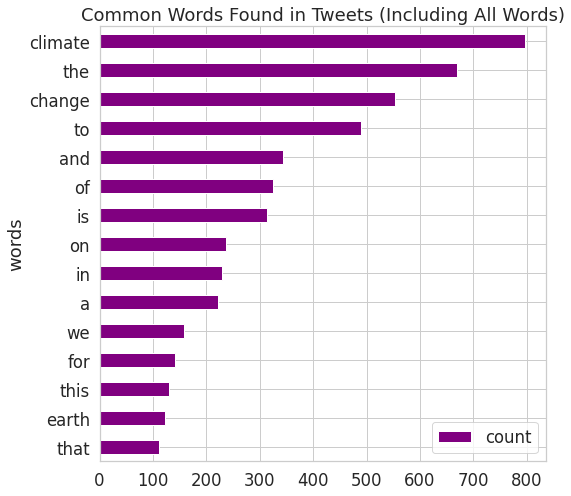

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['no', 'hers', 'just', 'does', 'all', 'those', 'it', 'did', 'both', "doesn't"]

In [49]:
words_in_tweet[0]

['the',
 'army',
 'is',
 'leading',
 'the',
 'dod',
 'as',
 'the',
 'first',
 'military',
 'branch',
 'to',
 'have',
 'an',
 'official',
 'position',
 'on',
 'climate',
 'change',
 'by',
 'publishi']

In [51]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['army',
 'leading',
 'dod',
 'first',
 'military',
 'branch',
 'official',
 'position',
 'climate',
 'change',
 'publishi']

In [52]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('climate', 796),
 ('change', 554),
 ('earth', 122),
 ('climatechange', 99),
 ('day', 96),
 ('earthday', 93),
 ('action', 71),
 ('amp', 69),
 ('us', 45),
 ('planet', 45),
 ('people', 43),
 ('take', 41),
 ('new', 41),
 ('globalwarming', 40),
 ('twitter', 40)]

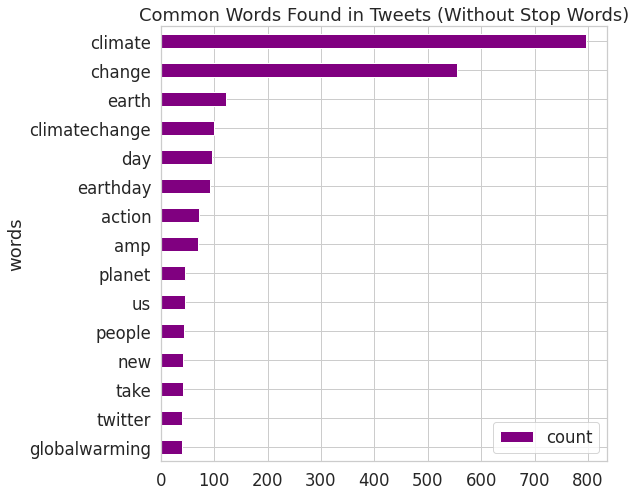

In [53]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [54]:
collection_words = ['climatechange', 'climate', 'change']

In [55]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [56]:
tweets_nsw[0]

['army',
 'leading',
 'dod',
 'first',
 'military',
 'branch',
 'official',
 'position',
 'climate',
 'change',
 'publishi']

In [57]:
tweets_nsw_nc[0]

['army',
 'leading',
 'dod',
 'first',
 'military',
 'branch',
 'official',
 'position',
 'publishi']

In [58]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('earth', 122),
 ('day', 96),
 ('earthday', 93),
 ('action', 71),
 ('amp', 69),
 ('us', 45),
 ('planet', 45),
 ('people', 43),
 ('take', 41),
 ('new', 41),
 ('globalwarming', 40),
 ('twitter', 40),
 ('today', 39),
 ('2022', 35),
 ('help', 35)]

In [59]:
len(counts_nsw_nc)

3782

In [60]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,earth,122
1,day,96
2,earthday,93
3,action,71
4,amp,69


In [119]:
clean_tweets_ncw.to_csv('refined_tweets.csv')
clean_tweets_ncw.shape

(15, 2)

In [120]:
clean_tweets_ncw

,words,count
0,earth,122
1,day,96
2,earthday,93
3,action,71
4,amp,69
5,us,45
6,planet,45
7,people,43
8,take,41
9,new,41


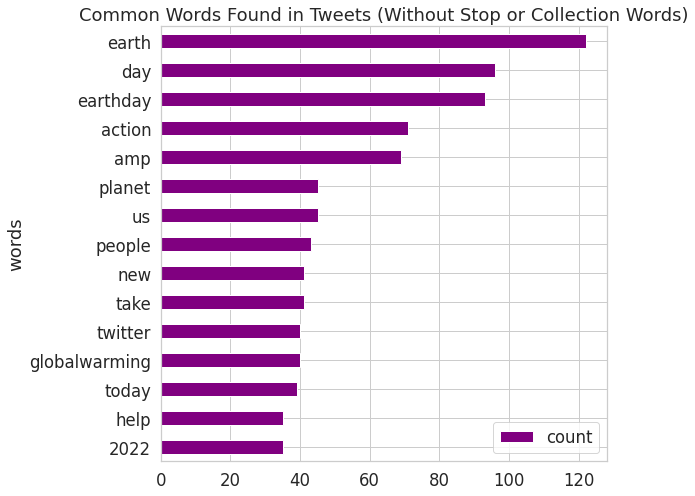

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

# **Part 2: Sentimental Analysis:**

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.

I have used the Python package textblob to calculate the polarity values of individual tweets. For this analysis I want to include emojiis as they represent sentiment. This step has not been included below.

Begin by creating textblob objects, which assign polarity values to the tweets. I have to identify the polarity value using the attribute polarity of texblob object.

In [65]:
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [66]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.45,
 TextBlob("Grim news via makower Support for urgent action to curb climate change is waning polls indicate Judging by th"))

In [67]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[-0.45,
 'Grim news via makower Support for urgent action to curb climate change is waning polls indicate Judging by th']

In [68]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,-0.450000,Grim news via makower Support for urgent actio...
1,0.187500,The SECs proposed rules governing climaterelat...
2,0.000000,Housing justice and climate justice are inextr...
3,0.116667,Black and Brown communities disproportionately...
4,0.000000,Earth climate change 10 NFT abstractnft nftart...


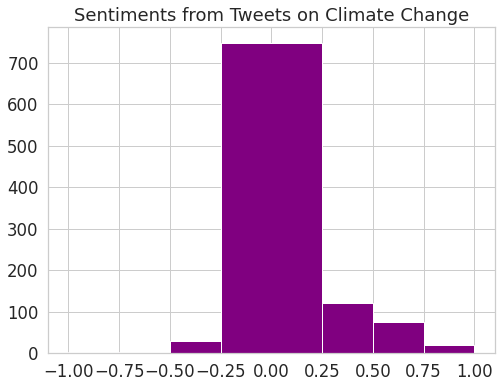

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [70]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

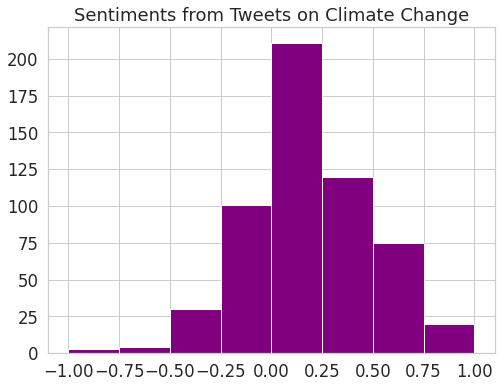

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [73]:
search_term = "#NASA"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Todays Mission Control Academy has started where Mahzel talks about Apollo guidance SPS burns and using the Apol"),
 TextBlob("NASA has a plan to fix Lucy spacecrafts solar array problem from GeorginaTorbet"),
 TextBlob("Date Apr 25 2003Title M17 A Hubble CloseUpRead more at apod astronomy space"),
 TextBlob("NASAJPL JPL NASA Science 20042022 Retwitted 25042022 EmiHermesBot"),
 TextBlob("The 25 billion Hubble Space Telescope was launched on this day in 1990 It had initial optical issues with the te")]

In [74]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
2,0.50,Date Apr 25 2003Title M17 A Hubble CloseUpRead...
5,0.65,So good I had to share Check out all the items...
8,-0.40,So this is the connection I always wondered wh...
14,0.40,The crew of the Ax1 private mission returned o...
17,0.40,Want to know the weather on Mars alexa skill M...


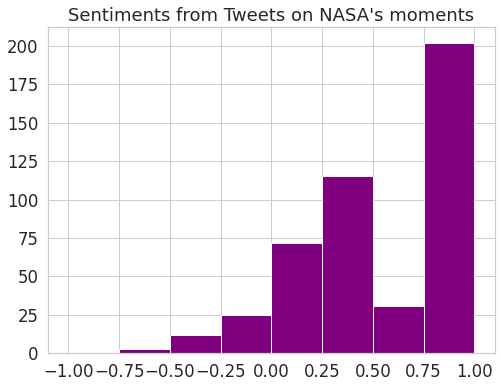

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on NASA's moments")
plt.show()

# **Part 3: Process a JSON File with Twitter Data in Python**

In [76]:
flood_tweets_path = os.path.join("twitter-flood", 
                                 "boulder_flood_geolocated_tweets.json")
flood_tweets_path

'twitter-flood/boulder_flood_geolocated_tweets.json'

In [92]:
import earthpy as et

# Get the already collected twitter data in JSON format
et.data.get_data('twitter-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))


In [93]:
# Loop through each tweet in the JSON file and append it to a list
flood_tweets = []
for line in open(flood_tweets_path, 'r'):
    flood_tweets.append(json.loads(line))

# View a single tweet in your list.
flood_tweets[1]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Dec 31 18:49:31 +0000 2013',
 'entities': {'hashtags': [{'indices': [108, 113], 'text': 'snow'},
   {'indices': [114, 119], 'text': 'COwx'},
   {'indices': [120, 128], 'text': 'weather'},
   {'indices': [129, 136], 'text': 'Denver'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1214463582,
    'id_str': '1214463582',
    'indices': [0, 14],
    'name': 'WeatherDude',
    'screen_name': 'WeatherDude17'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 418091565161017345,
 'id_str': '418091565161017345',
 'in_reply_to_screen_name': 'WeatherDude17',
 'in_reply_to_status_id': 418091408994471937,
 'in_reply_to_status_id_str': '418091408994471937',
 'in_reply_to_user_id': 1214463582,
 'in_reply_to_user_id_str': '1214463582',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="no

**Json Stored as Python Dictionaries**

In [94]:
type(flood_tweets[1])

dict

A dictionary is a hierarchical Python data a format that allows you to store nested information. You can access elements of the dictionary using keys

In [95]:
a_single_tweet = flood_tweets[1]
a_single_tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [96]:
# View the created at time stamp in the dictionary
a_single_tweet["created_at"]

'Tue Dec 31 18:49:31 +0000 2013'

In [97]:
a_single_tweet["entities"]["hashtags"]

[{'indices': [108, 113], 'text': 'snow'},
 {'indices': [114, 119], 'text': 'COwx'},
 {'indices': [120, 128], 'text': 'weather'},
 {'indices': [129, 136], 'text': 'Denver'}]

In [98]:
# Get the second item in the list and it's associated hashtag
a_single_tweet["entities"]["hashtags"][1]["text"]

'COwx'

In [102]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[2]

(-0.45,
 TextBlob("Housing justice and climate justice are inextricably linked and equity demands that manageable commutes be avai"))

In [103]:
# Create list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[2:8]

[[0.0,
  'Housing justice and climate justice are inextricably linked and equity demands that manageable commutes be avai'],
 [0.11666666666666668,
  'Black and Brown communities disproportionately impacted by climate change are an important source of talent'],
 [0.0,
  'Earth climate change 10 NFT abstractnft nftart NFTartists Nftarts nftartgallery'],
 [0.0,
  'Sell your car and use a bike instead while I take a private jet and spend 10000 in fuel climate change'],
 [0.08125000000000002,
  'SenWarren The science is also clear animal agriculture is a major carbon producer EarthDay should be a reminder'],
 [0.4,
  'NSF NatGeoMag Anyone have any ideas if there are grants available for photo projects that will help communicate t']]

In [106]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,-0.450000,Grim news via makower Support for urgent actio...
1,0.187500,The SECs proposed rules governing climaterelat...
2,0.000000,Housing justice and climate justice are inextr...
3,0.116667,Black and Brown communities disproportionately...
4,0.000000,Earth climate change 10 NFT abstractnft nftart...


In [105]:

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity in our dataframe
sentiment_df[["subjectivity", "polarity"]] = sentiment_df.apply(sentiment_analysis, axis=1)

sentiment_df

,polarity,tweet,subjectivity
0,-0.450000,Grim news via makower Support for urgent actio...,0.550000
1,0.187500,The SECs proposed rules governing climaterelat...,0.470833
2,0.000000,Housing justice and climate justice are inextr...,0.000000
3,0.116667,Black and Brown communities disproportionately...,0.716667
4,0.000000,Earth climate change 10 NFT abstractnft nftart...,0.000000
...,...,...,...
995,0.100000,Trees are a natural resource that can be utili...,0.400000
996,0.200000,EarthDay 2022 Today Google Doodle uses real ti...,0.300000
997,0.000000,Invest in our planet this is the moment to mak...,0.000000
998,-0.600000,Crazy respect to elonmusk Tesla Message to us ...,0.900000


**Clean the text by removing irrelevant information like hashtags, mentions, retweets and links**

In [114]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

# Clean The Text
sentiment_df["tweet"] = sentiment_df["tweet"].apply(cleantext)

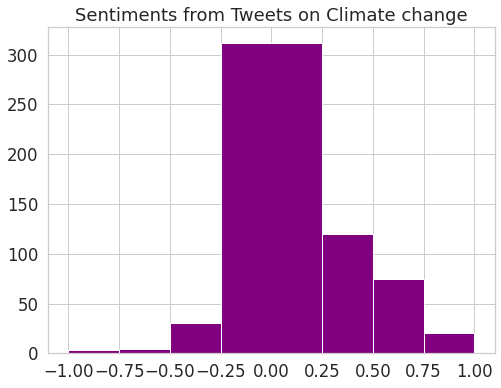

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate change")
plt.show()

In [116]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

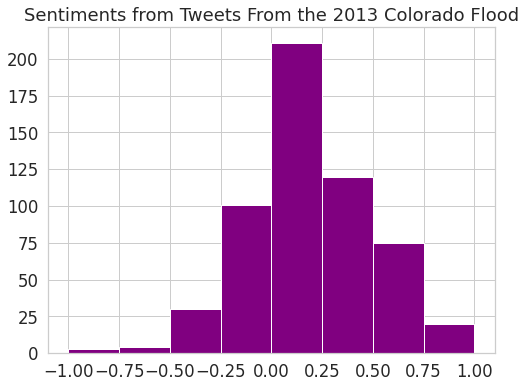

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets From the 2013 Colorado Flood")
plt.show()

This plot displays a revised histogram of polarity values for tweets on climate change. For this histogram, polarity values equal to zero have been removed, and a break has been added at zero, to better highlight the distribution of polarity values

# **Word Count**

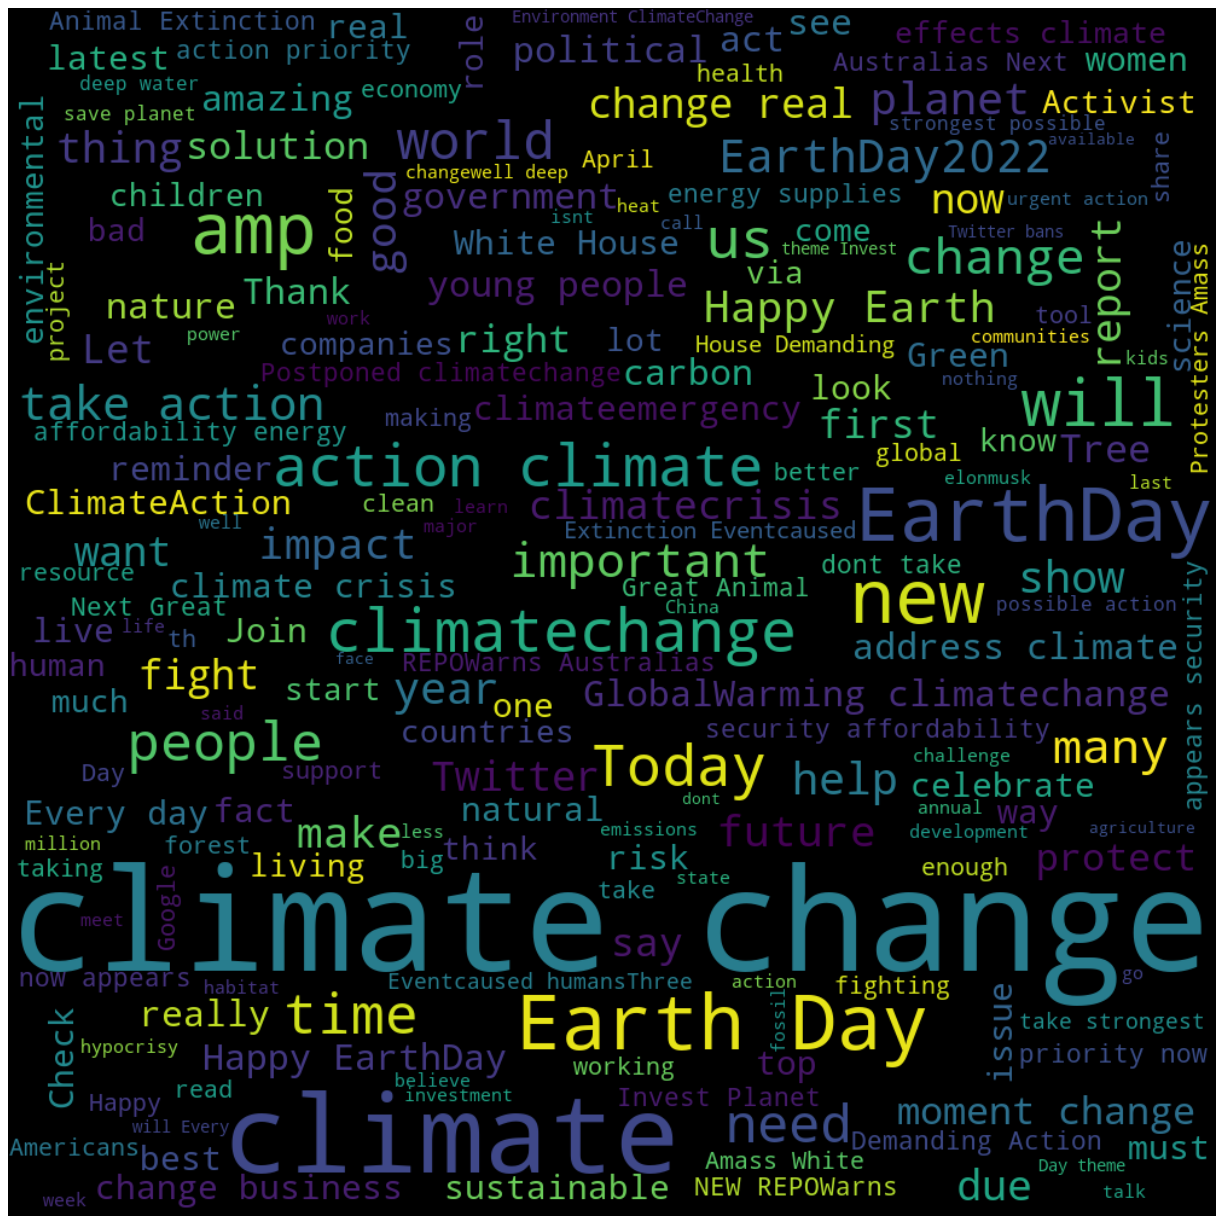

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in sentiment_df["tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()